# Identify Characteristic Values for the Spring Mass System - Gradient Descent
The gradient descent algorithm is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. The gradient vector determined points in the direction of the fastest increase. The gradient descent algorithm goes in the opposite direction of the gradient at the current operation point and finds the minimum of the function by repetitive application. The parameter combination with the best score is used to simulate the system behavior and the best result is plotted in the specified time period. 

In this experimet, the measured data as plotted first.

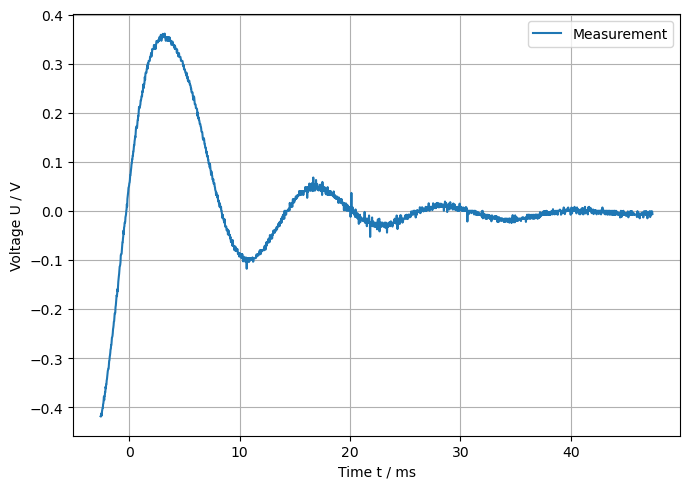

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read and format data
signal = pd.read_csv('scope_1.csv', header=1)
signal['time'] = signal['second']*1000
signal = signal.drop(['second'], axis=1)
signal = signal.rename(columns={'Volt': 'measurement'})

# Plot signals
ax1 = plt.figure(1, figsize=(7, 5)).subplots(1, 1)
ax1.plot(signal['time'], signal['measurement'], label='Measurement')
ax1.set_xlabel(r'Time t / ms')
ax1.set_ylabel(r'Voltage U / V')
ax1.legend()
ax1.grid()
plt.tight_layout()

The measured signal is compared with a simulated signal based on mathematical description

$x\left( t \right) = A_0 \cdot {e^{{\delta _0} \cdot \left( {t - {t_0}} \right)}} \cdot \cos \left( {\frac{{2 \cdot \pi }}{{{T_0}}} \cdot \left( {t - {t_0}} \right)} \right) \cdot \sigma \left( {t - {t_0}} \right)$

In order to evaluate the simulation with the experiment, the RMS value is defined as cost function. It determines the difference between measurement and simulation as a vector.

In [2]:
def cost_function(x, time, measurement):
    A, T, t, d = x
    simulation = A * (np.exp(d*(time - t)) * np.cos(2*np.pi/T*(time - t))) * (time > 0)
    cost = simulation - measurement
    return cost

For each parameter a vector of values is defined. The brute function determines the cost function for every permutation of parameter values. The fmin argument finds an optimum with inter digital precision by interpolation.

RMS score: 0.0191


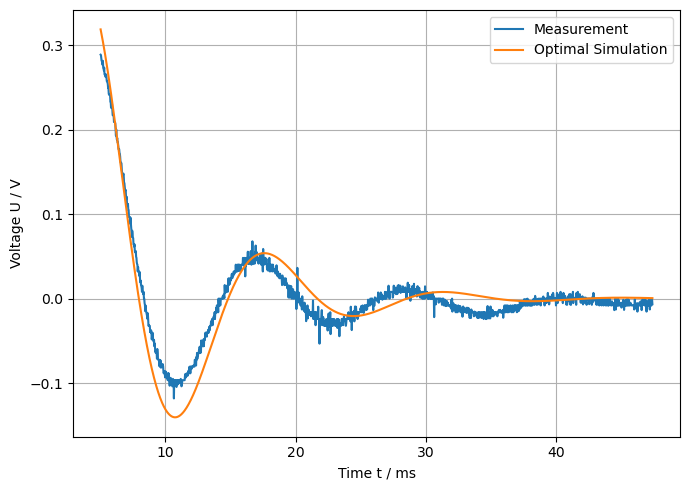

In [3]:
from scipy.optimize import least_squares

# Define initial value and lower und upper bounds for optimization
A_0 = 2.5
T_0 = 13.7
t_0 = 3.7
d_0 = -0.14
x_0 = [A_0, T_0, t_0, d_0]
bounds = ([0.35, 13.7, 3.7, -0.14], [2.7, 19, 7, -0.01])

# Run optimization
params_best = least_squares(cost_function, x0=x_0, bounds=bounds, verbose=0, method='dogbox', args=(signal.loc[signal.time > 5, ['time', 'measurement']].values.T))

# Decode optimization result
A_0, T_0, t_0, d_0 = params_best.x

# Generate Signal with best parameter
signal['simulation'] = A_0 * (np.exp(d_0*(signal['time']-t_0)) * np.cos(2*np.pi/T_0*(signal['time']-t_0))) * (signal['time'] > 0)

# Plot signals
ax1 = plt.figure(1, figsize=(7, 5)).subplots(1, 1)
ax1.plot(signal.loc[signal.time > 5, 'time'], signal.loc[signal.time > 5, 'measurement'], label='Measurement')
ax1.plot(signal.loc[signal.time > 5, 'time'], signal.loc[signal.time > 5, 'simulation'], label='Optimal Simulation')
ax1.set_xlabel(r'Time t / ms')
ax1.set_ylabel(r'Voltage U / V')
ax1.legend()
ax1.grid()
plt.tight_layout()

# rms score for comparison
measurement = signal.loc[signal.time > 5, 'measurement']
simulation = signal.loc[signal.time > 5, 'simulation']
N = measurement.shape
rms = np.sqrt(((simulation - measurement)**2).sum() / N).round(4)
print(f'RMS score: {rms[0]}')